# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather['coord']['lat']
        city_lng =city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | hobyo
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | argo
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | lubang
Processing Record 16 of Set 1 | souppes-sur-loing
Processing Record 17 of Set 1 | chake chake
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | manp'o
City not found. Skipping...
Processing Record 21 of Set 1 | enewetak
Processi

Processing Record 38 of Set 4 | westport
Processing Record 39 of Set 4 | kandyagash
Processing Record 40 of Set 4 | st. john's
Processing Record 41 of Set 4 | polyarnyy
Processing Record 42 of Set 4 | paraiso
Processing Record 43 of Set 4 | holualoa
Processing Record 44 of Set 4 | gapyeong
Processing Record 45 of Set 4 | hadibu
Processing Record 46 of Set 4 | tura
Processing Record 47 of Set 4 | half moon bay
Processing Record 48 of Set 4 | kodinsk
Processing Record 49 of Set 4 | mgandu
Processing Record 0 of Set 5 | salekhard
Processing Record 1 of Set 5 | bandarbeyla
Processing Record 2 of Set 5 | atar
Processing Record 3 of Set 5 | forster
Processing Record 4 of Set 5 | adrar
Processing Record 5 of Set 5 | rikaze
Processing Record 6 of Set 5 | san julian
Processing Record 7 of Set 5 | fort morgan
Processing Record 8 of Set 5 | college
Processing Record 9 of Set 5 | usinsk
Processing Record 10 of Set 5 | sungai penuh
Processing Record 11 of Set 5 | morondava
Processing Record 12 of S

Processing Record 33 of Set 8 | midvagur
Processing Record 34 of Set 8 | muscat
Processing Record 35 of Set 8 | serang
Processing Record 36 of Set 8 | necochea
Processing Record 37 of Set 8 | emerald
Processing Record 38 of Set 8 | beteza
City not found. Skipping...
Processing Record 39 of Set 8 | tweed heads
Processing Record 40 of Set 8 | vincennes
Processing Record 41 of Set 8 | bogatoye
Processing Record 42 of Set 8 | kerikeri
Processing Record 43 of Set 8 | port alfred
Processing Record 44 of Set 8 | tolanaro
Processing Record 45 of Set 8 | mulchen
Processing Record 46 of Set 8 | zhezqazghan
Processing Record 47 of Set 8 | kuybyshev
Processing Record 48 of Set 8 | petrovsk
Processing Record 49 of Set 8 | togur
Processing Record 0 of Set 9 | luderitz
Processing Record 1 of Set 9 | lebu
Processing Record 2 of Set 9 | mar del plata
Processing Record 3 of Set 9 | 'ohonua
City not found. Skipping...
Processing Record 4 of Set 9 | ahau
City not found. Skipping...
Processing Record 5 of 

Processing Record 24 of Set 12 | kargopol'
Processing Record 25 of Set 12 | saldanha
Processing Record 26 of Set 12 | abatskoye
Processing Record 27 of Set 12 | petauke
Processing Record 28 of Set 12 | brigantine
Processing Record 29 of Set 12 | tamanrasset
Processing Record 30 of Set 12 | timimoun
Processing Record 31 of Set 12 | howard springs
Processing Record 32 of Set 12 | tamiahua
Processing Record 33 of Set 12 | karonga
Processing Record 34 of Set 12 | santana
Processing Record 35 of Set 12 | tiznit
Processing Record 36 of Set 12 | pailon
Processing Record 37 of Set 12 | qujing
Processing Record 38 of Set 12 | qrendi
Processing Record 39 of Set 12 | pontes e lacerda
Processing Record 40 of Set 12 | miyaly
Processing Record 41 of Set 12 | strezhevoy
Processing Record 42 of Set 12 | moses lake
Processing Record 43 of Set 12 | arvayheer
Processing Record 44 of Set 12 | corner brook
Processing Record 45 of Set 12 | santa ana
Processing Record 46 of Set 12 | laibin
Processing Record 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame( city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,28.99,65,40,6.17,CC,1701323463
1,bilibino,68.0546,166.4372,-33.38,97,26,1.33,RU,1701323464
2,port elizabeth,-33.9180,25.5701,19.62,71,20,7.20,ZA,1701323464
3,blackmans bay,-43.0167,147.3167,15.07,73,100,4.44,AU,1701323465
4,bethel,41.3712,-73.4140,0.93,55,100,1.54,US,1701323358


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities2.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities2.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,28.99,65,40,6.17,CC,1701323463
1,bilibino,68.0546,166.4372,-33.38,97,26,1.33,RU,1701323464
2,port elizabeth,-33.9180,25.5701,19.62,71,20,7.20,ZA,1701323464
3,blackmans bay,-43.0167,147.3167,15.07,73,100,4.44,AU,1701323465
4,bethel,41.3712,-73.4140,0.93,55,100,1.54,US,1701323358


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

/Users/msuncor/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


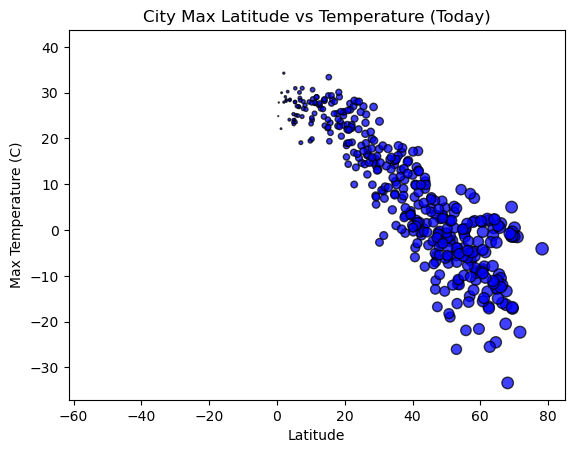

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black",
            s=city_data_df['Lat'], alpha=0.75)
plt.title("City Max Latitude vs Temperature (Today)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.savefig("../output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

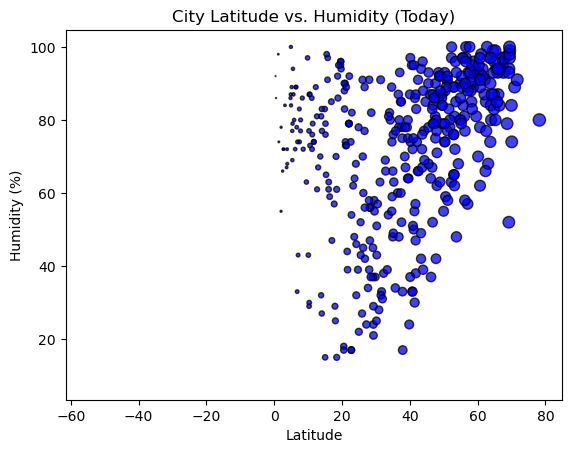

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="black",
            s=city_data_df['Lat'], alpha=0.75)
plt.title("City Latitude vs. Humidity (Today)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

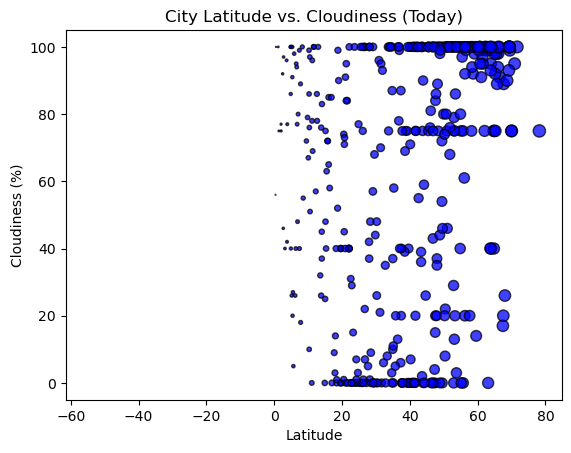

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black",
            s=city_data_df['Lat'], alpha=0.75)
plt.title("City Latitude vs. Cloudiness (Today)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

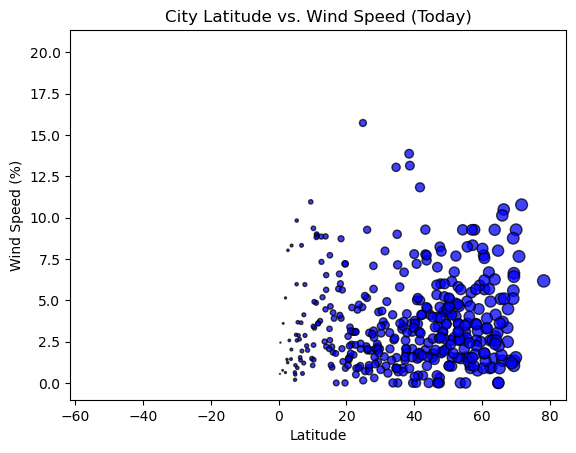

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black",
            s=city_data_df['Lat'], alpha=0.75)
plt.title("City Latitude vs. Wind Speed (Today)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.savefig("../output_data/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_reg(x_values,y_values,xlabel,ylabel):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.mean()+5,y_values.mean()+5),fontsize=12,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,-33.38,97,26,1.33,RU,1701323464
4,bethel,41.3712,-73.4140,0.93,55,100,1.54,US,1701323358
5,hobyo,5.3505,48.5268,27.99,69,91,9.82,SO,1701323465
6,albany,42.6001,-73.9662,-1.17,66,55,0.45,US,1701323342
8,vadso,70.0744,29.7487,0.49,74,75,9.26,NO,1701323466


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,28.99,65,40,6.17,CC,1701323463
2,port elizabeth,-33.9180,25.5701,19.62,71,20,7.20,ZA,1701323464
3,blackmans bay,-43.0167,147.3167,15.07,73,100,4.44,AU,1701323465
7,waitangi,-43.9535,-176.5597,12.12,77,37,4.02,NZ,1701323465
9,port-aux-francais,-49.3500,70.2167,2.43,85,97,20.32,TF,1701323466


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.795731557181144


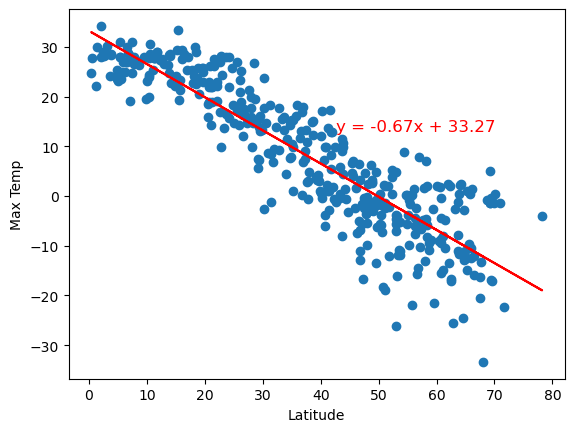

In [17]:
# Linear regression on Northern Hemisphere
plot_linear_reg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude','Max Temp')

The r-value is: 0.40417281340700556


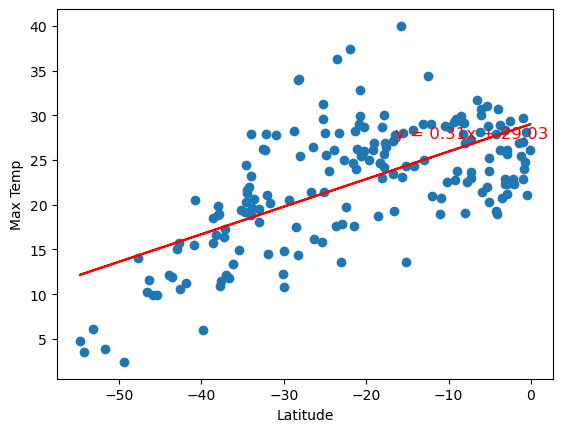

In [18]:
# Linear regression on Southern Hemisphere
plot_linear_reg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max Temp')

**Discussion about the linear relationship:** In the graphs of the Northern and Southern Hemispheres, it is observed that the temperature is highest at the Equator, decreasing towards the North and South Poles. It is also noted that the R-value is higher in the Northern Hemisphere than in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09935060173638169


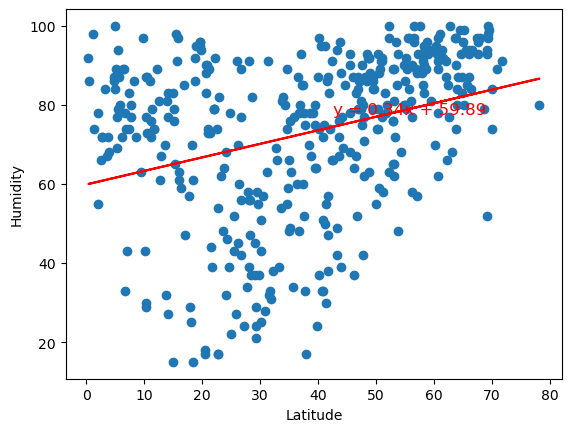

In [19]:
# Northern Hemisphere
plot_linear_reg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude','Humidity')

The r-value is: 0.05139542626855234


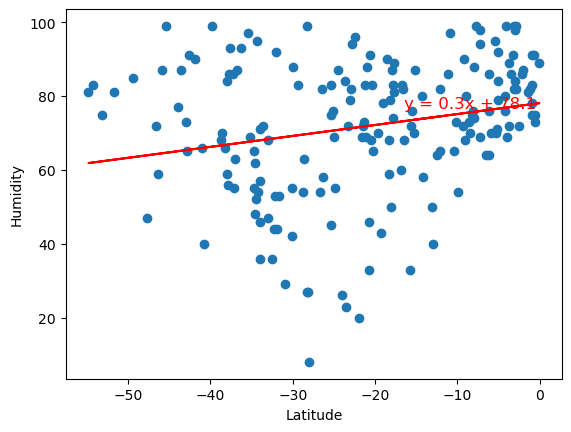

In [20]:
# Southern Hemisphere
plot_linear_reg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude','Humidity')

**Discussion about the linear relationship:** It is observed that in the graph of the Northern Hemisphere, humidity increases towards the North Pole, and in the graph of the Southern Hemisphere, humidity decreases towards the South Pole.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.056723120741255226


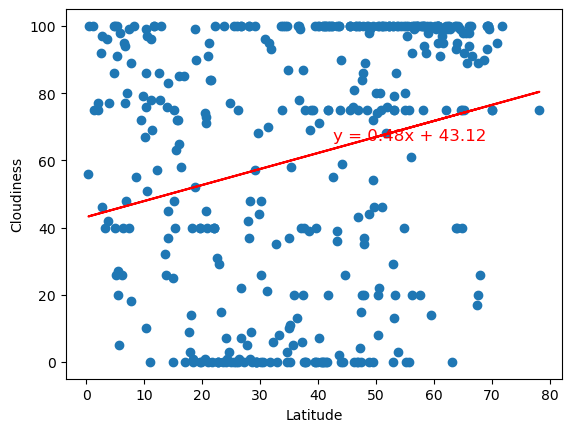

In [21]:
# Northern Hemisphere
plot_linear_reg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

The r-value is: 0.014385781693383873


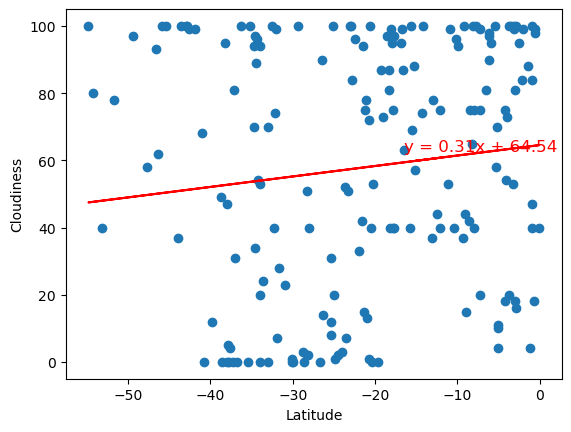

In [22]:
# Southern Hemisphere
plot_linear_reg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

**Discussion about the linear relationship:** In the graph of the Northern Hemisphere, cloudiness increases towards the North Pole, and in the graph of the Southern Hemisphere, cloudiness decreases towards the South Pole.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.005922019386269531


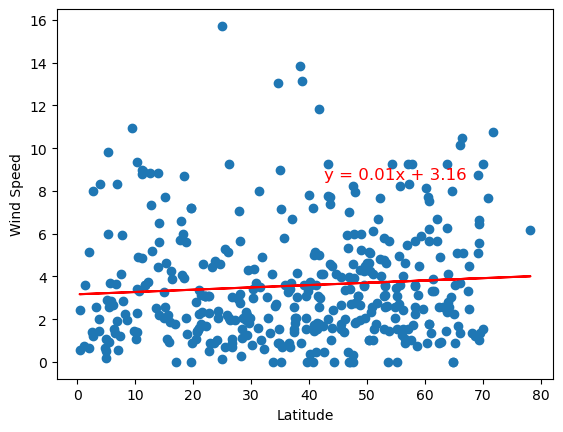

In [23]:
# Northern Hemisphere
plot_linear_reg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude','Wind Speed')

The r-value is: 0.11637121371464837


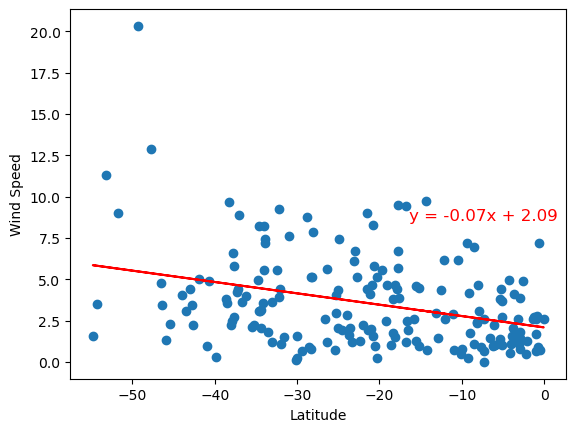

In [24]:
# Southern Hemisphere
plot_linear_reg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude','Wind Speed')

**Discussion about the linear relationship:** 
In both graphs, Wind Speed increases towards the poles, which possibly indicates a correlation with temperature since the temperature graphs exhibit the same behavior.